# Part N - Linear Regression

Let's get our feet wet with a very basic Machine Learning algorithm: Linear Regression.  
Everyone remembers the equation of a line:  
$$
y = mX + b
$$ 

For our first example, we will use the most highly correlated variable `sqft` as our independent variable (`X`).  
Using known values of `y`, we will iteratively generate a "best fit" line using least squares.  
We should then be able to get a (rough) `price` prediction for a new, unseen `sqft`.  
This is called *Univariate* Linear Regression since we are using only *one* independent variable. In a later example we will cover *Multivariate* Linear Regression so we can utilize many independent variables to produce a more accurate output.

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from branca.colormap import LinearColormap, StepColormap

%matplotlib inline

## Let's load the data and remind ourselves of the contents

In [2]:
df = pd.read_csv('./data/round3/rew_round3_with_latlng.csv')
df.head()

,address,price,link,bed,bath,sqft,age,gross_taxes_2017,strata_maintenance_fees,area,sub_area,property_type,strata_type,listing_id,primary_broker,features,amenities,school_info,latlng
0,405-12 Athletes Way,999000,https://www.rew.ca/properties/R2219336/405-12-...,2,1,884,8.0,2153.0,516.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2219336,Team 3000 Realty Ltd.,"Air Conditioning, ClthWsh/Dryr/Frdg/Stve/DW, M...","Club House, Elevator, Exercise Centre, Garden,...","[{'name': 'Simon Fraser Elementary School', 'a...","(49.271554, -123.106738)"
1,604-1661 Ontario Street,1398000,https://www.rew.ca/properties/R2221859/604-166...,2,2,1189,9.0,2721.0,679.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2221859,Trg The Residential Group Rlty,"ClthWsh/Dryr/Frdg/Stve/DW, Microwave","Bike Room, Exercise Centre, In Suite Laundry, ...","[{'name': 'Simon Fraser Elementary School', 'a...",MISSING
2,204-1529 W 6th Avenue,699000,https://www.rew.ca/properties/R2220891/204-152...,0,1,719,21.0,1456.0,361.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2220891,Macdonald Realty,"Dishwasher, Garage Door Opener","Elevator, Restaurant, Storage, Wheelchair Access","[{'name': 'Henry Hudson Elementary School', 'a...",MISSING
3,106-1551 Mariner Walk,929000,https://www.rew.ca/properties/R2222093/106-155...,2,2,1094,29.0,1983.0,493.0,Vancouver West,False Creek,Apt/Condo,Leasehold prepaid-Strata,R2222093,Engel & Volkers Vancouver,"ClthWsh/Dryr/Frdg/Stve/DW, Disposal - Waste, D...","Elevator, Garden, In Suite Laundry, Storage","[{'name': 'Henry Hudson Elementary School', 'a...",MISSING
4,1103-1783 Manitoba Street,859000,https://www.rew.ca/properties/R2222252/1103-17...,2,1,714,3.0,2018.0,361.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2222252,Sutton Grp West Coast (Brdwy),"ClthWsh/Dryr/Frdg/Stve/DW, Disposal - Waste, D...","Bike Room, Club House, Elevator, Exercise Cent...","[{'name': 'Simon Fraser Elementary School', 'a...",MISSING


Recall our line equation: 
$$
y = mX + b
$$ 

We set the 'price' column as the dependent variable `y` and the 'sqft' column as the independent variable `X`

In [3]:
X = df['sqft']
y = df['price']

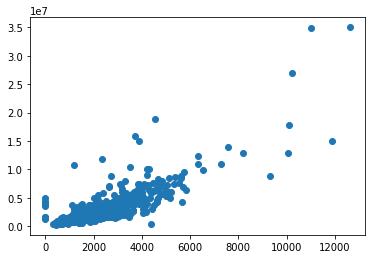

In [4]:
plt.scatter(X,y)

We observe a linear relationship between `X` and `y` and we could probably even predict a best fitting line using our eyes

In [5]:
regressor = LinearRegression(normalize=True)
model = regressor.fit(X.values[:,np.newaxis],y.values[:,np.newaxis])

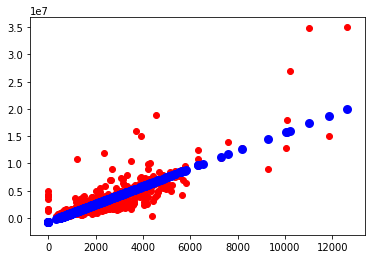

In [6]:
y_pred = model.predict(X.values[:,np.newaxis])
plt.scatter(X,y,color='red')
plt.scatter(X, y_pred, color='blue', linewidth=3)

In [42]:
new_sqft = 2116
predicted_price = model.predict(np.array([[new_sqft]]))
print("Predicted price is ${}M".format(predicted_price[0][0]/1e6))

Predicted price is $2.716573186746197M


## Multivariate Linear Regression

In [8]:
X_multi = X = df[['sqft', 'bed', 'bath']]

In [9]:
regressor_multi = LinearRegression(normalize=True)
model_multi = regressor_multi.fit(X_multi.values,y.values[:,np.newaxis])

In [48]:
new_sqft = 809
new_bed = 2
new_bath = 2
predicted_price = model_multi.predict(np.array([[new_sqft, new_bed, new_bath]]))
print("Predicted price is ${}M".format(predicted_price[0][0]/1e6))

Predicted price is $3137.95431304197M


## Our model is not working! Perhaps due to normalization

In [25]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

In [27]:
X_scaled = scaler.transform(X)

In [28]:
regressor_multi = LinearRegression(normalize=True)
model_multi = regressor_multi.fit(X_scaled,y.values[:,np.newaxis])

In [49]:
new_sqft = 2116
new_bed = 3
new_bath = 4
X_new = np.array([[new_sqft, new_bed, new_bath]])
predicted_price = model_multi.predict(scaler.transform(X_new))
print("Predicted price is ${}M".format(predicted_price[0][0]/1e6))

Predicted price is $2.925939179249985M


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## We can see that the multivariate performs marginally better. But we need more context for the regressor to perform optimally!
Right now we are not using some of the important categorical features such as Area and SubArea

# TODO: 
* ~~Scrape more data with more variables~~
* select features
* engineer features (dist to schools?, dist to city center?)
* Train a basic linear regressor
* Train a better model
* Train a neural network